In [25]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from citipy import citipy
import random
import csv
import requests
import time
from config import api_key

world_data = pd.read_csv("worldcities.csv")
world_data.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [26]:
selected_cities = world_data.sample(n=500)

selected_cities

,Country,City,Latitude,Longitude
32408,ro,bradeanu,44.933333,26.850000
5982,cn,haibowan,39.664722,106.812222
15296,hr,trogir,43.512500,16.251667
32567,ro,carlibaba,47.583333,25.133333
27720,ph,calapi,10.273600,122.974300
3225,br,juazeirinho,-6.816667,-38.050000
10345,ec,milagro,-2.066667,-79.533333
8273,cz,sluknov,51.004656,14.453761
38362,ru,staryy biser,58.413611,58.880278
23831,mx,guanajuato,21.016667,-101.250000


In [27]:
row_count = 0

selected_cities["Temperature"] = ""
selected_cities["Humidity"] = ""
selected_cities["Cloudiness"] = ""
selected_cities["Wind Speed"] = ""

for index, row in selected_cities.iterrows():
    
    time.sleep(1)
        
    url = "https://api.openweathermap.org/data/2.5/weather?"
    units = "Imperial"
    
    query_url = url + "lat="+ str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&appid=" + api_key + "&units=" + units
    
    print("Now retieving city # " + str(row_count))
    print(query_url)
    row_count += 1
        
    city_weather = requests.get(query_url).json()
    
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        selected_cities.set_value(index, "Temperature", temperature)
        selected_cities.set_value(index,"Humidity", humidity)
        selected_cities.set_value(index,"Cloudiness", cloudiness)
        selected_cities.set_value(index,"Wind Speed", wind_speed)
    except:
        print("Error with weather data, skipping.")
        
selected_cities

Now retieving city # 0
https://api.openweathermap.org/data/2.5/weather?lat=44.933333000000005&lon=26.85&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial


C:\Users\jjust\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jjust\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jjust\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\jjust\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Now retieving city # 1
https://api.openweathermap.org/data/2.5/weather?lat=39.664722&lon=106.81222199999999&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 2
https://api.openweathermap.org/data/2.5/weather?lat=43.5125&lon=16.251666699999998&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 3
https://api.openweathermap.org/data/2.5/weather?lat=47.583333&lon=25.133333&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 4
https://api.openweathermap.org/data/2.5/weather?lat=10.2736&lon=122.9743&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 5
https://api.openweathermap.org/data/2.5/weather?lat=-6.816667&lon=-38.05&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 6
https://api.openweathermap.org/data/2.5/weather?lat=-2.0666667000000003&lon=-79.5333333&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 7
https://api.openweathermap.org/data/2

Now retieving city # 54
https://api.openweathermap.org/data/2.5/weather?lat=7.341667&lon=125.575&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 55
https://api.openweathermap.org/data/2.5/weather?lat=44.566666999999995&lon=24.183332999999998&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 56
https://api.openweathermap.org/data/2.5/weather?lat=32.571027&lon=35.690251&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 57
https://api.openweathermap.org/data/2.5/weather?lat=46.542970000000004&lon=20.102127&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 58
https://api.openweathermap.org/data/2.5/weather?lat=47.377871999999996&lon=18.203534&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 59
https://api.openweathermap.org/data/2.5/weather?lat=45.133333&lon=25.633333&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 60
https://api.openwea

Now retieving city # 107
https://api.openweathermap.org/data/2.5/weather?lat=6.325983&lon=-75.768348&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 108
https://api.openweathermap.org/data/2.5/weather?lat=29.1691667&lon=-95.43166670000001&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 109
https://api.openweathermap.org/data/2.5/weather?lat=15.3137&lon=120.0304&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 110
https://api.openweathermap.org/data/2.5/weather?lat=11.061389&lon=124.61333300000001&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 111
https://api.openweathermap.org/data/2.5/weather?lat=53.7002&lon=102.7117&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 112
https://api.openweathermap.org/data/2.5/weather?lat=19.916667&lon=-102.016667&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 113
https://api.openweathermap.org

Now retieving city # 159
https://api.openweathermap.org/data/2.5/weather?lat=50.176253&lon=30.104291999999997&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 160
https://api.openweathermap.org/data/2.5/weather?lat=52.023061&lon=4.274782&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 161
https://api.openweathermap.org/data/2.5/weather?lat=4.397808&lon=-74.827313&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 162
https://api.openweathermap.org/data/2.5/weather?lat=17.575117000000002&lon=121.368847&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 163
https://api.openweathermap.org/data/2.5/weather?lat=30.4&lon=-109.65&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 164
https://api.openweathermap.org/data/2.5/weather?lat=8.4966&lon=123.3997&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 165
https://api.openweathermap.org/data/2.

Now retieving city # 212
https://api.openweathermap.org/data/2.5/weather?lat=23.464722199999997&lon=120.33194440000001&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 213
https://api.openweathermap.org/data/2.5/weather?lat=7.604&lon=126.1298&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 214
https://api.openweathermap.org/data/2.5/weather?lat=31.0775&lon=75.337222&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 215
https://api.openweathermap.org/data/2.5/weather?lat=15.4598&lon=120.7996&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 216
https://api.openweathermap.org/data/2.5/weather?lat=12.384139&lon=122.49901200000001&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 217
https://api.openweathermap.org/data/2.5/weather?lat=10.616666699999998&lon=-66.83333329999999&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 218
https://ap

Now retieving city # 264
https://api.openweathermap.org/data/2.5/weather?lat=27.083333000000003&lon=80.516667&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 265
https://api.openweathermap.org/data/2.5/weather?lat=53.533333&lon=-0.05&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 266
https://api.openweathermap.org/data/2.5/weather?lat=51.783333&lon=-3.2&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 267
https://api.openweathermap.org/data/2.5/weather?lat=14.474178&lon=100.122178&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 268
https://api.openweathermap.org/data/2.5/weather?lat=-22.566667000000002&lon=-44.966667&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 269
https://api.openweathermap.org/data/2.5/weather?lat=51.81773&lon=19.300709&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 270
https://api.openweathermap.org/dat

Now retieving city # 316
https://api.openweathermap.org/data/2.5/weather?lat=28.031968&lon=-15.50425&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 317
https://api.openweathermap.org/data/2.5/weather?lat=18.0576&lon=120.734&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 318
https://api.openweathermap.org/data/2.5/weather?lat=19.316667000000002&lon=84.783333&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 319
https://api.openweathermap.org/data/2.5/weather?lat=36.0652778&lon=-119.01583329999998&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 320
https://api.openweathermap.org/data/2.5/weather?lat=50.052037&lon=28.11745&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 321
https://api.openweathermap.org/data/2.5/weather?lat=45.678611&lon=13.386944&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 322
https://api.openweathermap.org

Now retieving city # 368
https://api.openweathermap.org/data/2.5/weather?lat=43.304444399999994&lon=-70.9761111&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 369
https://api.openweathermap.org/data/2.5/weather?lat=50.5287&lon=42.6747&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 370
https://api.openweathermap.org/data/2.5/weather?lat=43.645401&lon=0.587933&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 371
https://api.openweathermap.org/data/2.5/weather?lat=-13.916666699999999&lon=-171.9833333&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 372
https://api.openweathermap.org/data/2.5/weather?lat=-33.384361&lon=148.007599&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 373
https://api.openweathermap.org/data/2.5/weather?lat=40.161666700000005&lon=44.088333299999995&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 374
https:

Now retieving city # 421
https://api.openweathermap.org/data/2.5/weather?lat=18.983333&lon=73.1&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 422
https://api.openweathermap.org/data/2.5/weather?lat=48.2&lon=3.2833330000000003&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 423
https://api.openweathermap.org/data/2.5/weather?lat=17.096943&lon=121.73724299999999&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 424
https://api.openweathermap.org/data/2.5/weather?lat=27.666666999999997&lon=-105.16666699999999&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 425
https://api.openweathermap.org/data/2.5/weather?lat=43.528695&lon=5.448791&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 426
https://api.openweathermap.org/data/2.5/weather?lat=26.17&lon=-98.0516667&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 427
https://api.openweath

Now retieving city # 474
https://api.openweathermap.org/data/2.5/weather?lat=43.141388899999995&lon=-95.1441667&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 475
https://api.openweathermap.org/data/2.5/weather?lat=45.116667&lon=25.1&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 476
https://api.openweathermap.org/data/2.5/weather?lat=38.8041667&lon=-77.205&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 477
https://api.openweathermap.org/data/2.5/weather?lat=43.55&lon=-81.383333&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 478
https://api.openweathermap.org/data/2.5/weather?lat=47.255481&lon=16.930410000000002&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 479
https://api.openweathermap.org/data/2.5/weather?lat=21.016667&lon=-102.166667&appid=7b0186b71cd3e4a9c4b7f18498349572&units=Imperial
Now retieving city # 480
https://api.openweathermap.org/d

,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
32408,ro,bradeanu,44.933333,26.850000,85.38,39,80,11.52
5982,cn,haibowan,39.664722,106.812222,60.81,93,92,4.03
15296,hr,trogir,43.512500,16.251667,82.4,51,0,4.7
32567,ro,carlibaba,47.583333,25.133333,64.41,80,20,1.9
27720,ph,calapi,10.273600,122.974300,74.13,99,56,0.45
3225,br,juazeirinho,-6.816667,-38.050000,91.68,29,8,9.17
10345,ec,milagro,-2.066667,-79.533333,77,69,75,10.29
8273,cz,sluknov,51.004656,14.453761,80.6,44,0,2.24
38362,ru,staryy biser,58.413611,58.880278,57.93,98,92,11.63
23831,mx,guanajuato,21.016667,-101.250000,68,72,90,4.7


In [28]:
selected_cities.to_csv("WorldWeatherData.csv", index=False)

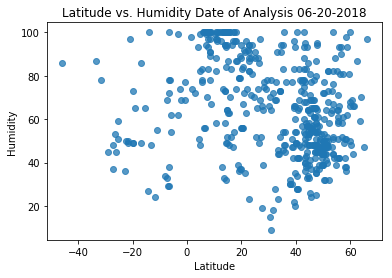

In [29]:

plt.scatter(selected_cities["Latitude"],selected_cities["Humidity"], alpha = 0.75)

plt.title("Latitude vs. Humidity Date of Analysis 06-20-2018")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

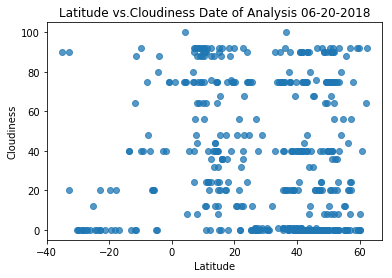

In [20]:
plt.scatter(selected_cities["Latitude"],selected_cities["Cloudiness"], alpha = 0.75)

plt.title("Latitude vs.Cloudiness Date of Analysis 06-20-2018")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

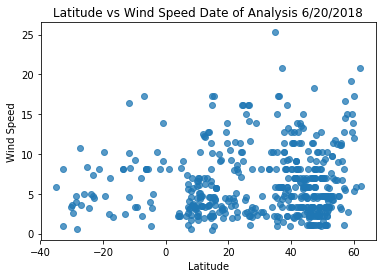

In [21]:
plt.scatter(selected_cities["Latitude"],selected_cities["Wind Speed"], alpha= 0.75)
plt.title("Latitude vs Wind Speed Date of Analysis 6/20/2018")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind Speed.png")
plt.show()

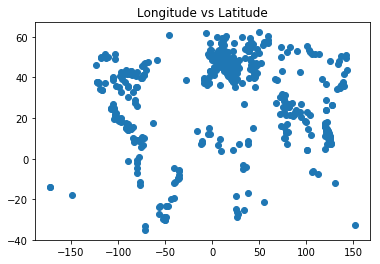

In [22]:
plt.scatter(selected_cities["Longitude"],selected_cities["Latitude"])
plt.title("Longitude vs Latitude")
plt.show()